In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from textwrap import wrap

## Single App plots

### workloads vs models - MAPE

In [12]:

# NN: 13.30	5.63	18.71	18.51	2.94	40.74
# LR: 14.16	17.34	13.49	11.18	6.67	13.20
# DT: 21.44	23.55	8.84	15.74	1.72	10.55
# RF: 9.98	20.11	5.96	11.84	1.18	8.21
# SVR: 4.95	4.40	3.39	9.36	2.68	14.89
# XGBoost: 13.42	12.20	26.55	25.24	5.99	13.62
# Lasso: 13.99	17.37	13.52	11.05	6.72	13.09


data = {
    'Neural Net': {
        'Memcached': 13.30,
        'Sysbench': 5.63,
        'MobileNN': 18.71,
        'Tensorflow': 18.51,
        'Filebench': 2.94,
        'MongoDB': 40.74
    },
    'Linear Reg': {
        'Memcached': 14.16,
        'Sysbench': 17.34,
        'MobileNN': 13.49,
        'Tensorflow': 11.18,
        'Filebench': 6.67,
        'MongoDB': 13.20
    },
    'Dec Tree': {
        'Memcached': 21.44,
        'Sysbench': 23.55,
        'MobileNN': 8.84,
        'Tensorflow': 15.74,
        'Filebench': 1.72,
        'MongoDB': 10.55
    },
    'Rnd Frst': {
        'Memcached': 9.98,
        'Sysbench': 20.11,
        'MobileNN': 5.96,
        'Tensorflow': 11.84,
        'Filebench': 1.18,
        'MongoDB': 8.21
    },
    'SVR': {
        'Memcached': 4.95,
        'Sysbench': 4.40,
        'MobileNN': 3.39,
        'Tensorflow': 9.36,
        'Filebench': 2.68,
        'MongoDB': 14.89
    },
    'XGBoost': {
        'Memcached': 13.42,
        'Sysbench': 12.20,
        'MobileNN': 26.55,
        'Tensorflow': 25.24,
        'Filebench': 5.99,
        'MongoDB': 13.62
    },
    'Lasso': {
        'Memcached': 13.99,
        'Sysbench': 17.37,
        'MobileNN': 13.52,
        'Tensorflow': 11.05,
        'Filebench': 6.72,
        'MongoDB': 13.09
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Memcached,Sysbench,MobileNN,Tensorflow,Filebench,MongoDB
Neural Net,13.30,5.63,18.71,18.51,2.94,40.74
Linear Reg,14.16,17.34,13.49,11.18,6.67,13.20
Dec Tree,21.44,23.55,8.84,15.74,1.72,10.55
Rnd Frst,9.98,20.11,5.96,11.84,1.18,8.21
SVR,4.95,4.40,3.39,9.36,2.68,14.89
XGBoost,13.42,12.20,26.55,25.24,5.99,13.62
Lasso,13.99,17.37,13.52,11.05,6.72,13.09


In [13]:
# order models by their average performance (descending)
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df

# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst', 'XGBoost'])

# order benchmarks by their average performance (descending) for each model
df = df.transpose()
df['Average'] = df.mean(axis=1)
df = df.sort_values(by=['Average'], ascending=False)
df = df.drop(columns=['Average'])
df = df.transpose()
df

,MongoDB,Tensorflow,Sysbench,Memcached,MobileNN,Filebench
Neural Net,40.74,18.51,5.63,13.30,18.71,2.94
Linear Reg,13.20,11.18,17.34,14.16,13.49,6.67
Lasso,13.09,11.05,17.37,13.99,13.52,6.72
SVR,14.89,9.36,4.40,4.95,3.39,2.68
Dec Tree,10.55,15.74,23.55,21.44,8.84,1.72
Rnd Frst,8.21,11.84,20.11,9.98,5.96,1.18
XGBoost,13.62,25.24,12.20,13.42,26.55,5.99


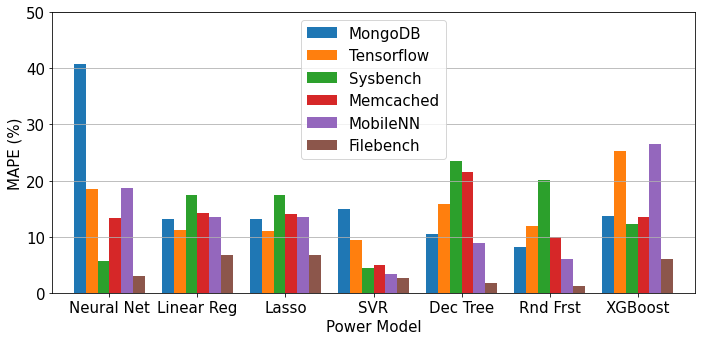

In [14]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# font size 15

# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper center')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.ylim(0, 50)
plt.tight_layout()
plt.rc('font', size=15)
image_format = 'pdf'
image_name = 'singleapp.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()


## Multiapp Segregated

### K-fold cross validation

In [10]:
# benchmarks: Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench	MongoDB + Filebench	Tensorflow + Filebench	Tensorflow + Memcached	MongoDB + Memcached

# NN: 1.6	2.5	8.4	6.5	3.2	16.0	4.0	15.9	11.2	26.6
									
# LR: 1.6	3.9	12.5	11.1	5.3	45.4	3.3	7.2	9.5	24.7
									
# DT: 2.8	4.1	14.5	10.1	11.6	23.1	4.6	9.5	7.5	35.6
									
# RF: 1.6	3.2	8.5	8.6	7.7	21.2	3.8	6.7	5.6	27.8
									
# SVR: 1.7	2.5	6.1	6.2	4.2	24.3	3.8	6.1	4.3	27.5
									
# XGBoost: 16.1	13.8	7.0	9.9	15.2	31.7	10.7	13.0	15.2	52.4
									
# Lasso: 1.6	3.9	12.4	11.7	3.9	45.1	3.3	7.2	9.5	25.4

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 1.6,
        'Sysbench + Memcached': 2.5,
        'Tensorflow + MongoDB': 8.4,
        'MobileNN + Filebench': 6.5,
        'Sysbench + MobileNN': 3.2,
        'Memcached + Filebench': 16.0,
        'MongoDB + Filebench': 4.0,
        'Tensorflow + Filebench': 15.9,
        'Tensorflow + Memcached': 11.2,
        'MongoDB + Memcached': 26.6
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 1.6,
        'Sysbench + Memcached': 3.9,
        'Tensorflow + MongoDB': 12.5,
        'MobileNN + Filebench': 11.1,
        'Sysbench + MobileNN': 5.3,
        'Memcached + Filebench': 45.4,
        'MongoDB + Filebench': 3.3,
        'Tensorflow + Filebench': 7.2,
        'Tensorflow + Memcached': 9.5,
        'MongoDB + Memcached': 24.7
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 2.8,
        'Sysbench + Memcached': 4.1,
        'Tensorflow + MongoDB': 14.5,
        'MobileNN + Filebench': 10.1,
        'Sysbench + MobileNN': 11.6,
        'Memcached + Filebench': 23.1,
        'MongoDB + Filebench': 4.6,
        'Tensorflow + Filebench': 9.5,
        'Tensorflow + Memcached': 7.5,
        'MongoDB + Memcached': 35.6
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 1.6,
        'Sysbench + Memcached': 3.2,
        'Tensorflow + MongoDB': 8.5,
        'MobileNN + Filebench': 8.6,
        'Sysbench + MobileNN': 7.7,
        'Memcached + Filebench': 21.2,
        'MongoDB + Filebench': 3.8,
        'Tensorflow + Filebench': 6.7,
        'Tensorflow + Memcached': 5.6,
        'MongoDB + Memcached': 27.8
    },
    'SVR': {
        'Tensorflow + MobileNN': 1.7,
        'Sysbench + Memcached': 2.5,
        'Tensorflow + MongoDB': 6.1,
        'MobileNN + Filebench': 6.2,
        'Sysbench + MobileNN': 4.2,
        'Memcached + Filebench': 24.3,
        'MongoDB + Filebench': 3.8,
        'Tensorflow + Filebench': 6.1,
        'Tensorflow + Memcached': 4.3,
        'MongoDB + Memcached': 27.5
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 16.1,
        'Sysbench + Memcached': 13.8,
        'Tensorflow + MongoDB': 7.0,
        'MobileNN + Filebench': 9.9,
        'Sysbench + MobileNN': 15.2,
        'Memcached + Filebench': 31.7,
        'MongoDB + Filebench': 10.7,
        'Tensorflow + Filebench': 13.0,
        'Tensorflow + Memcached': 15.2,
        'MongoDB + Memcached': 52.4
    },
    'Lasso': {
        'Tensorflow + MobileNN': 1.6,
        'Sysbench + Memcached': 3.9,
        'Tensorflow + MongoDB': 12.4,
        'MobileNN + Filebench': 11.7,
        'Sysbench + MobileNN': 3.9,
        'Memcached + Filebench': 45.1,
        'MongoDB + Filebench': 3.3,
        'Tensorflow + Filebench': 7.2,
        'Tensorflow + Memcached': 9.5,
        'MongoDB + Memcached': 25.4
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MobileNN,Sysbench + Memcached,Tensorflow + MongoDB,MobileNN + Filebench,Sysbench + MobileNN,Memcached + Filebench,MongoDB + Filebench,Tensorflow + Filebench,Tensorflow + Memcached,MongoDB + Memcached
Neural Net,1.6,2.5,8.4,6.5,3.2,16.0,4.0,15.9,11.2,26.6
Linear Reg,1.6,3.9,12.5,11.1,5.3,45.4,3.3,7.2,9.5,24.7
Dec Tree,2.8,4.1,14.5,10.1,11.6,23.1,4.6,9.5,7.5,35.6
Rnd Frst,1.6,3.2,8.5,8.6,7.7,21.2,3.8,6.7,5.6,27.8
SVR,1.7,2.5,6.1,6.2,4.2,24.3,3.8,6.1,4.3,27.5
XGBoost,16.1,13.8,7.0,9.9,15.2,31.7,10.7,13.0,15.2,52.4
Lasso,1.6,3.9,12.4,11.7,3.9,45.1,3.3,7.2,9.5,25.4


In [11]:
# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])
# df

# drop mongodb + memcached and memcached + filebench
df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_3140/960582754.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


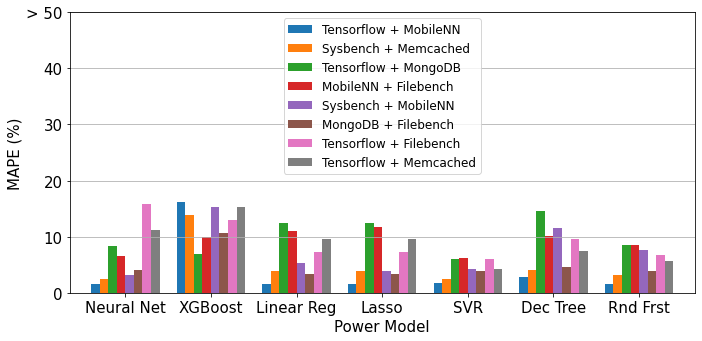

In [13]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
plt.rc('font', size=15)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper center', fontsize='12')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'kfold.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

### all except self

In [88]:
# benchmarks: Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench	MongoDB + Filebench	Tensorflow + Filebench	Tensorflow + Memcached	MongoDB + Memcached

# NN: 100.78	54.32	59.23	11.08	51.64	100.68	41.94	99.58	18.91	44.56
									
# LR: 25.7	23.42	14.87	11.36	7.96	10.34	9.04	7.57	11.47	16.23
									
# DT: 13.77	30.71	14.2	12.19	13.03	25.01	16.15	13.01	13.44	36.28
									
# RF: 11.97	20.76	11.74	10.63	9.39	12.06	8.54	12.63	9.35	19.77
									
# SVR: 6.78	8.74	12.48	11.47	10.54	11.05	18.66	11.6	8.94	21.53
									
# XGBoost: 45.06	41.3	42.4	46.14	34.85	42.99	44.21	41.17	37.68	40.24
									
# Lasso: 25.69	23.59	14.75	11.28	7.61	10.25	8.86	7.28	11.39	15.55

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 100.78,
        'Sysbench + Memcached': 54.32,
        'Tensorflow + MongoDB': 59.23,
        'MobileNN + Filebench': 11.08,
        'Sysbench + MobileNN': 51.64,
        'Memcached + Filebench': 100.68,
        'MongoDB + Filebench': 41.94,
        'Tensorflow + Filebench': 99.58,
        'Tensorflow + Memcached': 18.91,
        'MongoDB + Memcached': 44.56
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 25.7,
        'Sysbench + Memcached': 23.42,
        'Tensorflow + MongoDB': 14.87,
        'MobileNN + Filebench': 11.36,
        'Sysbench + MobileNN': 7.96,
        'Memcached + Filebench': 10.34,
        'MongoDB + Filebench': 9.04,
        'Tensorflow + Filebench': 7.57,
        'Tensorflow + Memcached': 11.47,
        'MongoDB + Memcached': 16.23
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 13.77,
        'Sysbench + Memcached': 30.71,
        'Tensorflow + MongoDB': 14.2,
        'MobileNN + Filebench': 12.19,
        'Sysbench + MobileNN': 13.03,
        'Memcached + Filebench': 25.01,
        'MongoDB + Filebench': 16.15,
        'Tensorflow + Filebench': 13.01,
        'Tensorflow + Memcached': 13.44,
        'MongoDB + Memcached': 36.28
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 11.97,
        'Sysbench + Memcached': 20.76,
        'Tensorflow + MongoDB': 11.74,
        'MobileNN + Filebench': 10.63,
        'Sysbench + MobileNN': 9.39,
        'Memcached + Filebench': 12.06,
        'MongoDB + Filebench': 8.54,
        'Tensorflow + Filebench': 12.63,
        'Tensorflow + Memcached': 9.35,
        'MongoDB + Memcached': 19.77
    },
    'SVR': {
        'Tensorflow + MobileNN': 6.78,
        'Sysbench + Memcached': 8.74,
        'Tensorflow + MongoDB': 12.48,
        'MobileNN + Filebench': 11.47,
        'Sysbench + MobileNN': 10.54,
        'Memcached + Filebench': 11.05,
        'MongoDB + Filebench': 18.66,
        'Tensorflow + Filebench': 11.6,
        'Tensorflow + Memcached': 8.94,
        'MongoDB + Memcached': 21.53
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 45.06,
        'Sysbench + Memcached': 41.3,
        'Tensorflow + MongoDB': 42.4,
        'MobileNN + Filebench': 46.14,
        'Sysbench + MobileNN': 34.85,
        'Memcached + Filebench': 42.99,
        'MongoDB + Filebench': 44.21,
        'Tensorflow + Filebench': 41.17,
        'Tensorflow + Memcached': 37.68,
        'MongoDB + Memcached': 40.24
    },
    'Lasso': {
        'Tensorflow + MobileNN': 25.69,
        'Sysbench + Memcached': 23.59,
        'Tensorflow + MongoDB': 14.75,
        'MobileNN + Filebench': 11.28,
        'Sysbench + MobileNN': 7.61,
        'Memcached + Filebench': 10.25,
        'MongoDB + Filebench': 8.86,
        'Tensorflow + Filebench': 7.28,
        'Tensorflow + Memcached': 11.39,
        'MongoDB + Memcached': 15.55
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MNN,Sysbench + Memcached,Tensorflow + MongoDB,MNN + Filebench,Sysbench + MNN,Memcached + Filebench,MongoDB + Filebench,Tensorflow + Filebench,Tensorflow + Memcached,MongoDB + Memcached
Neural Net,100.78,54.32,59.23,11.08,51.64,100.68,41.94,99.58,18.91,44.56
Linear Reg,25.70,23.42,14.87,11.36,7.96,10.34,9.04,7.57,11.47,16.23
Dec Tree,13.77,30.71,14.20,12.19,13.03,25.01,16.15,13.01,13.44,36.28
Rand Forest,11.97,20.76,11.74,10.63,9.39,12.06,8.54,12.63,9.35,19.77
Sup Vec Reg,6.78,8.74,12.48,11.47,10.54,11.05,18.66,11.60,8.94,21.53
XGBoost,45.06,41.30,42.40,46.14,34.85,42.99,44.21,41.17,37.68,40.24
Lasso,25.69,23.59,14.75,11.28,7.61,10.25,8.86,7.28,11.39,15.55


In [89]:
# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])
# df

# drop mongodb + memcached and memcached + filebench
df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_15358/1356303675.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


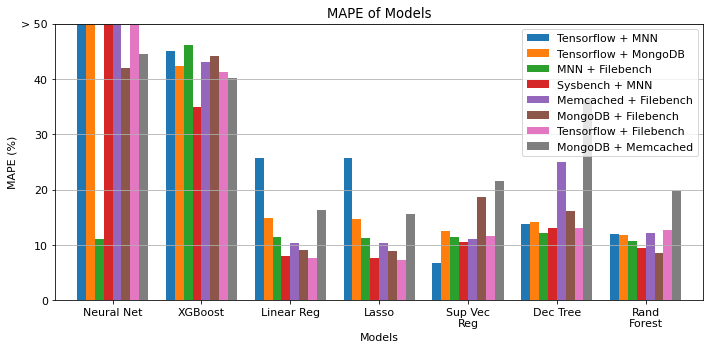

In [90]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.title('MAPE of Models')
plt.legend(loc='upper right')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'eps'
image_name = 'exceptself.eps'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

### all except A or B

In [7]:
# benchmarks: Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench	MongoDB + Filebench	Tensorflow + Filebench	Tensorflow + Memcached	MongoDB + Memcached

# 59.74	100.34	59.79	99.7	51.37	99.68	100.97	96.61	283.94	100.69
									
# 21.45	14.16	12.52	5.26	13.89	10.69	6.41	11.35	10.29	14.66
									
# 11.29	34.2	13.38	27.53	14.79	21.6	19.57	9.85	15.4	27.46
									
# 9.03	16.48	10.33	21.54	18.34	12.41	12.81	11.95	9.74	16.13
									
# 6.32	7.16	17.33	4.3	8.01	13.51	16.65	14.31	13.04	22.85
									
# 39.69	38.11	40.57	45.92	43.97	39.93	36.14	33.82	33.4	41.79
									
# 21.65	14.17	12.55	5.24	13.89	10.65	6.15	11.26	10.2	13.68

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 59.74,
        'Sysbench + Memcached': 100.34,
        'Tensorflow + MongoDB': 59.79,
        'MobileNN + Filebench': 99.7,
        'Sysbench + MobileNN': 51.37,
        'Memcached + Filebench': 99.68,
        'MongoDB + Filebench': 100.97,
        'Tensorflow + Filebench': 96.61,
        'Tensorflow + Memcached': 283.94,
        'MongoDB + Memcached': 100.69
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 21.45,
        'Sysbench + Memcached': 14.16,
        'Tensorflow + MongoDB': 12.52,
        'MobileNN + Filebench': 5.26,
        'Sysbench + MobileNN': 13.89,
        'Memcached + Filebench': 10.69,
        'MongoDB + Filebench': 6.41,
        'Tensorflow + Filebench': 11.35,
        'Tensorflow + Memcached': 10.29,
        'MongoDB + Memcached': 14.66
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 11.29,
        'Sysbench + Memcached': 34.2,
        'Tensorflow + MongoDB': 13.38,
        'MobileNN + Filebench': 27.53,
        'Sysbench + MobileNN': 14.79,
        'Memcached + Filebench': 21.6,
        'MongoDB + Filebench': 19.57,
        'Tensorflow + Filebench': 9.85,
        'Tensorflow + Memcached': 15.4,
        'MongoDB + Memcached': 27.46
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 9.03,
        'Sysbench + Memcached': 16.48,
        'Tensorflow + MongoDB': 10.33,
        'MobileNN + Filebench': 21.54,
        'Sysbench + MobileNN': 18.34,
        'Memcached + Filebench': 12.41,
        'MongoDB + Filebench': 12.81,
        'Tensorflow + Filebench': 11.95,
        'Tensorflow + Memcached': 9.74,
        'MongoDB + Memcached': 16.13
    },
    'SVR': {
        'Tensorflow + MobileNN': 6.32,
        'Sysbench + Memcached': 7.16,
        'Tensorflow + MongoDB': 17.33,
        'MobileNN + Filebench': 4.3,
        'Sysbench + MobileNN': 8.01,
        'Memcached + Filebench': 13.51,
        'MongoDB + Filebench': 16.65,
        'Tensorflow + Filebench': 14.31,
        'Tensorflow + Memcached': 13.04,
        'MongoDB + Memcached': 22.85
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 39.69,
        'Sysbench + Memcached': 38.11,
        'Tensorflow + MongoDB': 40.57,
        'MobileNN + Filebench': 45.92,
        'Sysbench + MobileNN': 43.97,
        'Memcached + Filebench': 39.93,
        'MongoDB + Filebench': 36.14,
        'Tensorflow + Filebench': 33.82,
        'Tensorflow + Memcached': 33.4,
        'MongoDB + Memcached': 41.79
    },
    'Lasso': {
        'Tensorflow + MobileNN': 21.65,
        'Sysbench + Memcached': 14.17,
        'Tensorflow + MongoDB': 12.55,
        'MobileNN + Filebench': 5.24,
        'Sysbench + MobileNN': 13.89,
        'Memcached + Filebench': 10.65,
        'MongoDB + Filebench': 6.15,
        'Tensorflow + Filebench': 11.26,
        'Tensorflow + Memcached': 10.2,
        'MongoDB + Memcached': 13.68
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MobileNN,Sysbench + Memcached,Tensorflow + MongoDB,MobileNN + Filebench,Sysbench + MobileNN,Memcached + Filebench,MongoDB + Filebench,Tensorflow + Filebench,Tensorflow + Memcached,MongoDB + Memcached
Neural Net,59.74,100.34,59.79,99.70,51.37,99.68,100.97,96.61,283.94,100.69
Linear Reg,21.45,14.16,12.52,5.26,13.89,10.69,6.41,11.35,10.29,14.66
Dec Tree,11.29,34.20,13.38,27.53,14.79,21.60,19.57,9.85,15.40,27.46
Rnd Frst,9.03,16.48,10.33,21.54,18.34,12.41,12.81,11.95,9.74,16.13
SVR,6.32,7.16,17.33,4.30,8.01,13.51,16.65,14.31,13.04,22.85
XGBoost,39.69,38.11,40.57,45.92,43.97,39.93,36.14,33.82,33.40,41.79
Lasso,21.65,14.17,12.55,5.24,13.89,10.65,6.15,11.26,10.20,13.68


In [8]:
# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])
# df

# drop mongodb + memcached and memcached + filebench
df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_3140/2813564770.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


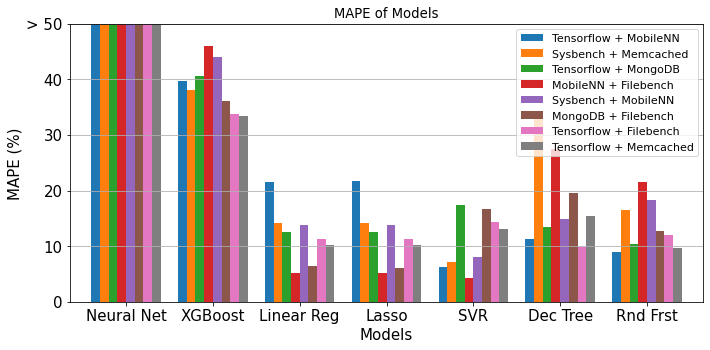

In [9]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.title('MAPE of Models')
plt.legend(loc='upper right')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'exceptAB2.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

### never seen before

In [5]:
# benchmarks: Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench	MongoDB + Filebench	Tensorflow + Filebench	Tensorflow + Memcached	MongoDB + Memcached

# 6.84	9.24	17.95	18.66	14.4	37.06	16.37	17.3	43.87	30.11
									
# 7.74	11.81	37.61	20.8	12.15	36.87	9.21	46.66	51.2	42.08
									
# 11.29	15.18	11.85	8.66	13.6	10.51	17.4	8.05	12.38	11.76
									
# 7.25	16.51	7.64	4.34	8.64	8.78	9.59	6.27	11.5	10.96
									
# 8	10.94	15.74	15.88	13.38	23.35	23.29	19.42	12.4	21.87
									
# 9.64	3.24	5.77	3.76	6.66	14.13	14.91	7.91	6.32	18.35
									
# 7.57	11.75	37.19	20.85	12.15	36.73	9.24	46.27	50.68	41.51

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 6.84,
        'Sysbench + Memcached': 9.24,
        'Tensorflow + MongoDB': 17.95,
        'MobileNN + Filebench': 18.66,
        'Sysbench + MobileNN': 14.4,
        'Memcached + Filebench': 37.06,
        'MongoDB + Filebench': 16.37,
        'Tensorflow + Filebench': 17.3,
        'Tensorflow + Memcached': 43.87,
        'MongoDB + Memcached': 30.11
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 7.74,
        'Sysbench + Memcached': 11.81,
        'Tensorflow + MongoDB': 37.61,
        'MobileNN + Filebench': 20.8,
        'Sysbench + MobileNN': 12.15,
        'Memcached + Filebench': 36.87,
        'MongoDB + Filebench': 9.21,
        'Tensorflow + Filebench': 46.66,
        'Tensorflow + Memcached': 51.2,
        'MongoDB + Memcached': 42.08
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 11.29,
        'Sysbench + Memcached': 15.18,
        'Tensorflow + MongoDB': 11.85,
        'MobileNN + Filebench': 8.66,
        'Sysbench + MobileNN': 13.6,
        'Memcached + Filebench': 10.51,
        'MongoDB + Filebench': 17.4,
        'Tensorflow + Filebench': 8.05,
        'Tensorflow + Memcached': 12.38,
        'MongoDB + Memcached': 11.76
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 7.25,
        'Sysbench + Memcached': 16.51,
        'Tensorflow + MongoDB': 7.64,
        'MobileNN + Filebench': 4.34,
        'Sysbench + MobileNN': 8.64,
        'Memcached + Filebench': 8.78,
        'MongoDB + Filebench': 9.59,
        'Tensorflow + Filebench': 6.27,
        'Tensorflow + Memcached': 11.5,
        'MongoDB + Memcached': 10.96
    },
    'SVR': {
        'Tensorflow + MobileNN': 8,
        'Sysbench + Memcached': 10.94,
        'Tensorflow + MongoDB': 15.74,
        'MobileNN + Filebench': 15.88,
        'Sysbench + MobileNN': 13.38,
        'Memcached + Filebench': 23.35,
        'MongoDB + Filebench': 23.29,
        'Tensorflow + Filebench': 19.42,
        'Tensorflow + Memcached': 12.4,
        'MongoDB + Memcached': 21.87
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 9.64,
        'Sysbench + Memcached': 3.24,
        'Tensorflow + MongoDB': 5.77,
        'MobileNN + Filebench': 3.76,
        'Sysbench + MobileNN': 6.66,
        'Memcached + Filebench': 14.13,
        'MongoDB + Filebench': 14.91,
        'Tensorflow + Filebench': 7.91,
        'Tensorflow + Memcached': 6.32,
        'MongoDB + Memcached': 18.35
    },
    'Lasso': {
        'Tensorflow + MobileNN': 7.57,
        'Sysbench + Memcached': 11.75,
        'Tensorflow + MongoDB': 37.19,
        'MobileNN + Filebench': 20.85,
        'Sysbench + MobileNN': 12.15,
        'Memcached + Filebench': 36.73,
        'MongoDB + Filebench': 9.24,
        'Tensorflow + Filebench': 46.27,
        'Tensorflow + Memcached': 50.68,
        'MongoDB + Memcached': 41.51
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MobileNN,Sysbench + Memcached,Tensorflow + MongoDB,MobileNN + Filebench,Sysbench + MobileNN,Memcached + Filebench,MongoDB + Filebench,Tensorflow + Filebench,Tensorflow + Memcached,MongoDB + Memcached
Neural Net,6.84,9.24,17.95,18.66,14.40,37.06,16.37,17.30,43.87,30.11
Linear Reg,7.74,11.81,37.61,20.80,12.15,36.87,9.21,46.66,51.20,42.08
Dec Tree,11.29,15.18,11.85,8.66,13.60,10.51,17.40,8.05,12.38,11.76
Rnd Frst,7.25,16.51,7.64,4.34,8.64,8.78,9.59,6.27,11.50,10.96
SVR,8.00,10.94,15.74,15.88,13.38,23.35,23.29,19.42,12.40,21.87
XGBoost,9.64,3.24,5.77,3.76,6.66,14.13,14.91,7.91,6.32,18.35
Lasso,7.57,11.75,37.19,20.85,12.15,36.73,9.24,46.27,50.68,41.51


In [6]:
# order models by their average performance (descending)
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df

# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

# drop mongodb + memcached and memcached + filebench
df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_13382/2516043596.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


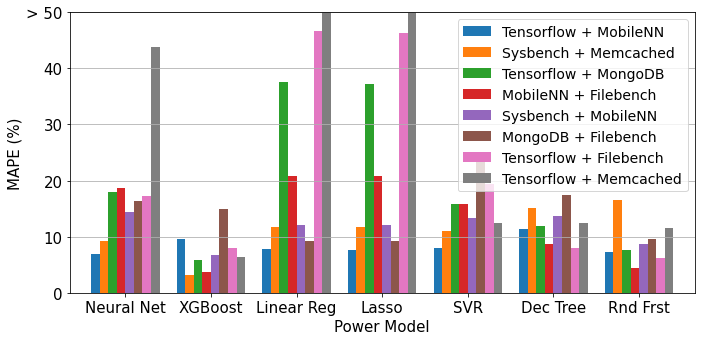

In [8]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
plt.rc('font', size=15)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
# plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper right', fontsize='14')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'neverseen.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

### Multiapp combined power

In [189]:
# benchmarks: Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench	MongoDB + Filebench	Tensorflow + Filebench	Tensorflow + Memcached	MongoDB + Memcached

# 11.31	8.86	12.49	11.59	7.73	46.75	8.22	8.35	9.09	14.96
									
# 15.08	10.61	41.52	32.02	20.68	47.03	8.81	56.71	60.56	53.22
									
# 15.48	13.74	7.6	10.64	12.12	14.08	15.45	9.41	7.37	23.79
									
# 13.9	9.6	6.4	6.77	6.06	10.54	9.98	8.56	6.4	22.48
									
# 10.69	4.3	10.19	7.28	6.86	12.91	8.7	12.88	18.22	16.06
									
# 31.23	17.91	21.09	14.26	20.74	18.58	13.16	16.36	18.93	18.15
									
# 14.92	10.78	43.06	32.37	20.83	46.87	8.74	56.31	60.03	52.64

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 11.31,
        'Sysbench + Memcached': 8.86,
        'Tensorflow + MongoDB': 12.49,
        'MobileNN + Filebench': 11.59,
        'Sysbench + MobileNN': 7.73,
        'Memcached + Filebench': 46.75,
        'MongoDB + Filebench': 8.22,
        'Tensorflow + Filebench': 8.35,
        'Tensorflow + Memcached': 9.09,
        'MongoDB + Memcached': 14.96
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 15.08,
        'Sysbench + Memcached': 10.61,
        'Tensorflow + MongoDB': 41.52,
        'MobileNN + Filebench': 32.02,
        'Sysbench + MobileNN': 20.68,
        'Memcached + Filebench': 47.03,
        'MongoDB + Filebench': 8.81,
        'Tensorflow + Filebench': 56.71,
        'Tensorflow + Memcached': 60.56,
        'MongoDB + Memcached': 53.22
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 15.48,
        'Sysbench + Memcached': 13.74,
        'Tensorflow + MongoDB': 7.6,
        'MobileNN + Filebench': 10.64,
        'Sysbench + MobileNN': 12.12,
        'Memcached + Filebench': 14.08,
        'MongoDB + Filebench': 15.45,
        'Tensorflow + Filebench': 9.41,
        'Tensorflow + Memcached': 7.37,
        'MongoDB + Memcached': 23.79
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 13.9,
        'Sysbench + Memcached': 9.6,
        'Tensorflow + MongoDB': 6.4,
        'MobileNN + Filebench': 6.77,
        'Sysbench + MobileNN': 6.06,
        'Memcached + Filebench': 10.54,
        'MongoDB + Filebench': 9.98,
        'Tensorflow + Filebench': 8.56,
        'Tensorflow + Memcached': 6.4,
        'MongoDB + Memcached': 22.48
    },
    'SVR': {
        'Tensorflow + MobileNN': 10.69,
        'Sysbench + Memcached': 4.3,
        'Tensorflow + MongoDB': 10.19,
        'MobileNN + Filebench': 7.28,
        'Sysbench + MobileNN': 6.86,
        'Memcached + Filebench': 12.91,
        'MongoDB + Filebench': 8.7,
        'Tensorflow + Filebench': 12.88,
        'Tensorflow + Memcached': 18.22,
        'MongoDB + Memcached': 16.06
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 31.23,
        'Sysbench + Memcached': 17.91,
        'Tensorflow + MongoDB': 21.09,
        'MobileNN + Filebench': 14.26,
        'Sysbench + MobileNN': 20.74,
        'Memcached + Filebench': 18.58,
        'MongoDB + Filebench': 13.16,
        'Tensorflow + Filebench': 16.36,
        'Tensorflow + Memcached': 18.93,
        'MongoDB + Memcached': 18.15
    },
    'Lasso': {
        'Tensorflow + MobileNN': 14.92,
        'Sysbench + Memcached': 10.78,
        'Tensorflow + MongoDB': 43.06,
        'MobileNN + Filebench': 32.37,
        'Sysbench + MobileNN': 20.83,
        'Memcached + Filebench': 46.87,
        'MongoDB + Filebench': 8.74,
        'Tensorflow + Filebench': 56.31,
        'Tensorflow + Memcached': 60.03,
        'MongoDB + Memcached': 52.64
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MNN,Sysbench + Memcached,Tensorflow + MongoDB,MNN + Filebench,Sysbench + MNN,Memcached + Filebench,MongoDB + Filebench,Tensorflow + Filebench,Tensorflow + Memcached,MongoDB + Memcached
Neural Net,11.31,8.86,12.49,11.59,7.73,46.75,8.22,8.35,9.09,14.96
Linear Reg,15.08,10.61,41.52,32.02,20.68,47.03,8.81,56.71,60.56,53.22
Dec Tree,15.48,13.74,7.60,10.64,12.12,14.08,15.45,9.41,7.37,23.79
Rnd Frst,13.90,9.60,6.40,6.77,6.06,10.54,9.98,8.56,6.40,22.48
SVR,10.69,4.30,10.19,7.28,6.86,12.91,8.70,12.88,18.22,16.06
XGBoost,31.23,17.91,21.09,14.26,20.74,18.58,13.16,16.36,18.93,18.15
Lasso,14.92,10.78,43.06,32.37,20.83,46.87,8.74,56.31,60.03,52.64


In [190]:
# order models by their average performance (descending)
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df

# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

# drop mongodb + memcached and memcached + filebench
df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_15358/220649751.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


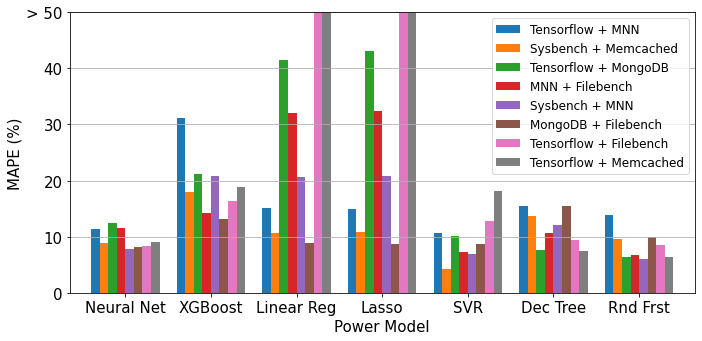

In [192]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15

# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
legend = plt.legend(loc='upper right', fontsize='12')
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor((0.1, 0.1, 0.1, 0.1))
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()
plt.rc('font', size=15)
image_format = 'pdf'
image_name = 'multiappcombined.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

In [31]:
# benchmarks:  Tensorflow + MobileNN	Sysbench + Memcached	Tensorflow + MongoDB	MobileNN + Filebench	Sysbench + MobileNN	Memcached + Filebench

# 38.69	55.07	91.41	57.17	50.14	64.95
					
# 25.46	22.39	52.69	12.01	15.91	37.27
					
# 32.71	29.75	13.98	25.73	23.22	26.85
					
# 33.94	29.13	11.98	20.1	17.22	25.06
					
# 38.2	21.1	21.75	30.95	16.4	44.87
					
# 65.96	62.53	48.89	63.33	61.89	67.08
					
# 25.36	22.34	52.44	12.01	15.8	37.2

'''
updated NN and XGBoost results

exp7app
NN 20.67
XG 28.85
exp8app
30.19
25.42
exp10app
17.92
12.31
exp11app
20.37
20.32
exp12app
33.58
15.7
exp13app
29.2
22.84
'''

data = {
    'Neural Net': {
        'Tensorflow + MobileNN': 20.67,
        'Sysbench + Memcached': 30.19,
        'Tensorflow + MongoDB': 17.92,
        'MobileNN + Filebench': 20.37,
        'Sysbench + MobileNN': 33.58,
        'Memcached + Filebench': 29.2
    },
    'Linear Reg': {
        'Tensorflow + MobileNN': 25.46,
        'Sysbench + Memcached': 22.39,
        'Tensorflow + MongoDB': 52.69,
        'MobileNN + Filebench': 12.01,
        'Sysbench + MobileNN': 15.91,
        'Memcached + Filebench': 37.27
    },
    'Dec Tree': {
        'Tensorflow + MobileNN': 32.71,
        'Sysbench + Memcached': 29.75,
        'Tensorflow + MongoDB': 13.98,
        'MobileNN + Filebench': 25.73,
        'Sysbench + MobileNN': 23.22,
        'Memcached + Filebench': 26.85
    },
    'Rnd Frst': {
        'Tensorflow + MobileNN': 33.94,
        'Sysbench + Memcached': 29.13,
        'Tensorflow + MongoDB': 11.98,
        'MobileNN + Filebench': 20.1,
        'Sysbench + MobileNN': 17.22,
        'Memcached + Filebench': 25.06
    },
    'SVR': {
        'Tensorflow + MobileNN': 38.2,
        'Sysbench + Memcached': 21.1,
        'Tensorflow + MongoDB': 21.75,
        'MobileNN + Filebench': 30.95,
        'Sysbench + MobileNN': 16.4,
        'Memcached + Filebench': 44.87
    },
    'XGBoost': {
        'Tensorflow + MobileNN': 28.85,
        'Sysbench + Memcached': 25.42,
        'Tensorflow + MongoDB': 12.31,
        'MobileNN + Filebench': 20.32,
        'Sysbench + MobileNN': 15.7,
        'Memcached + Filebench': 22.84
    },
    'Lasso': {
        'Tensorflow + MobileNN': 25.36,
        'Sysbench + Memcached': 22.34,
        'Tensorflow + MongoDB': 52.44,
        'MobileNN + Filebench': 12.01,
        'Sysbench + MobileNN': 15.8,
        'Memcached + Filebench': 37.2
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MobileNN,Sysbench + Memcached,Tensorflow + MongoDB,MobileNN + Filebench,Sysbench + MobileNN,Memcached + Filebench
Neural Net,20.67,30.19,17.92,20.37,33.58,29.20
Linear Reg,25.46,22.39,52.69,12.01,15.91,37.27
Dec Tree,32.71,29.75,13.98,25.73,23.22,26.85
Rnd Frst,33.94,29.13,11.98,20.10,17.22,25.06
SVR,38.20,21.10,21.75,30.95,16.40,44.87
XGBoost,28.85,25.42,12.31,20.32,15.70,22.84
Lasso,25.36,22.34,52.44,12.01,15.80,37.20


In [39]:
# compute the mean of NN and XGBoost

df['Average'] = df.mean(axis=1)
df

,Tensorflow + MobileNN,Sysbench + Memcached,Tensorflow + MongoDB,MobileNN + Filebench,Sysbench + MobileNN,Memcached + Filebench,Average
SVR,38.20,21.10,21.75,30.95,16.40,44.87,28.878333
Linear Reg,25.46,22.39,52.69,12.01,15.91,37.27,27.621667
Lasso,25.36,22.34,52.44,12.01,15.80,37.20,27.525000
Dec Tree,32.71,29.75,13.98,25.73,23.22,26.85,25.373333
Neural Net,20.67,30.19,17.92,20.37,33.58,29.20,25.321667
Rnd Frst,33.94,29.13,11.98,20.10,17.22,25.06,22.905000
XGBoost,28.85,25.42,12.31,20.32,15.70,22.84,20.906667


In [32]:
# order models by their average performance (descending)
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df

# order models by the following order: NN, XGBoost, LR, Lasso, SVR, DT, RF
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

# drop mongodb + memcached and memcached + filebench
# df = df.drop(columns=['MongoDB + Memcached', 'Memcached + Filebench'])

# order benchmarks by their average performance (descending) for each model
# df = df.transpose()
# df['Average'] = df.mean(axis=1)
# df = df.sort_values(by=['Average'], ascending=False)
# df = df.drop(columns=['Average'])
# df = df.transpose()
# df

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_13382/2795070409.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 60 else '> 60' for x in plt.gca().get_yticks()])


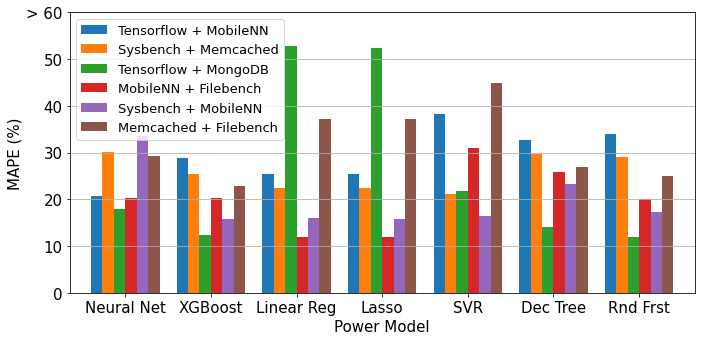

In [37]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 60)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 60 else '> 60' for x in plt.gca().get_yticks()])
# font size 15

# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
legend = plt.legend(loc='upper left', fontsize='13')
# legend.get_frame().set_alpha(None)
# legend.get_frame().set_facecolor((0.1, 0.1, 0.1, 0.1))
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()
plt.rc('font', size=15)
image_format = 'pdf'
image_name = 'model2.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

## three workloads

In [9]:
# workloads:  MNN + Memcached + Filebench	Sysbench + Filebench + Tensorflow	MongoDB + Tensorflow + MNN	Sysbench + Memcached + MongoDB	Filebench + MongoDB + Sysbench	 Memcached + MongoDB + Filebench

# 7.83	27.43	4.08	14.75	25.15	11.22	15.08

# 9.49	11.18	5.19	7.65	4.64	5.75	7.32
						
# 33.78	25.69	8.85	24.84	11.51	13.03	19.62
						
# 12.56	24.84	6.21	14.09	11.42	13.44	13.76
						
# 4.12	15.41	8.18	9.78	20.09	19.93	12.92

# 9.77	20.03	6.65	17.57	10.23	12.99	12.87
						
# 9.12	11.15	5.15	7.86	4.65	5.75	7.28

data = {
    'Neural Net': {
        'MNN + Memcached + Filebench': 7.83,
        'Sysbench + Filebench + Tensorflow': 27.43,
        'MongoDB + Tensorflow + MNN': 4.08,
        'Sysbench + Memcached + MongoDB': 14.75,
        'Filebench + MongoDB + Sysbench': 25.15,
        'Memcached + MongoDB + Filebench': 11.22
    },
    'Linear Reg': {
        'MNN + Memcached + Filebench': 9.49,
        'Sysbench + Filebench + Tensorflow': 11.18,
        'MongoDB + Tensorflow + MNN': 5.19,
        'Sysbench + Memcached + MongoDB': 7.65,
        'Filebench + MongoDB + Sysbench': 4.64,
        'Memcached + MongoDB + Filebench': 5.75
    },
    'Dec Tree': {
        'MNN + Memcached + Filebench': 33.78,
        'Sysbench + Filebench + Tensorflow': 25.69,
        'MongoDB + Tensorflow + MNN': 8.85,
        'Sysbench + Memcached + MongoDB': 24.84,
        'Filebench + MongoDB + Sysbench': 11.51,
        'Memcached + MongoDB + Filebench': 13.03
    },
    'Rnd Frst': {
        'MNN + Memcached + Filebench': 12.56,
        'Sysbench + Filebench + Tensorflow': 24.84,
        'MongoDB + Tensorflow + MNN': 6.21,
        'Sysbench + Memcached + MongoDB': 14.09,
        'Filebench + MongoDB + Sysbench': 11.42,
        'Memcached + MongoDB + Filebench': 13.44
    },
    'SVR': {
        'MNN + Memcached + Filebench': 4.12,
        'Sysbench + Filebench + Tensorflow': 15.41,
        'MongoDB + Tensorflow + MNN': 8.18,
        'Sysbench + Memcached + MongoDB': 9.78,
        'Filebench + MongoDB + Sysbench': 20.09,
        'Memcached + MongoDB + Filebench': 19.93
    },
    'XGBoost': {
        'MNN + Memcached + Filebench': 9.77,
        'Sysbench + Filebench + Tensorflow': 20.03,
        'MongoDB + Tensorflow + MNN': 6.65,
        'Sysbench + Memcached + MongoDB': 17.57,
        'Filebench + MongoDB + Sysbench': 10.23,
        'Memcached + MongoDB + Filebench': 12.99
    },
    'Lasso': {
        'MNN + Memcached + Filebench': 9.12,
        'Sysbench + Filebench + Tensorflow': 11.15,
        'MongoDB + Tensorflow + MNN': 5.15,
        'Sysbench + Memcached + MongoDB': 7.86,
        'Filebench + MongoDB + Sysbench': 4.65,
        'Memcached + MongoDB + Filebench': 5.75
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df


,MNN + Memcached + Filebench,Sysbench + Filebench + Tensorflow,MongoDB + Tensorflow + MNN,Sysbench + Memcached + MongoDB,Filebench + MongoDB + Sysbench,Memcached + MongoDB + Filebench
Neural Net,7.83,27.43,4.08,14.75,25.15,11.22
Linear Reg,9.49,11.18,5.19,7.65,4.64,5.75
Dec Tree,33.78,25.69,8.85,24.84,11.51,13.03
Rnd Frst,12.56,24.84,6.21,14.09,11.42,13.44
SVR,4.12,15.41,8.18,9.78,20.09,19.93
XGBoost,9.77,20.03,6.65,17.57,10.23,12.99
Lasso,9.12,11.15,5.15,7.86,4.65,5.75


In [10]:
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_13382/334926992.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


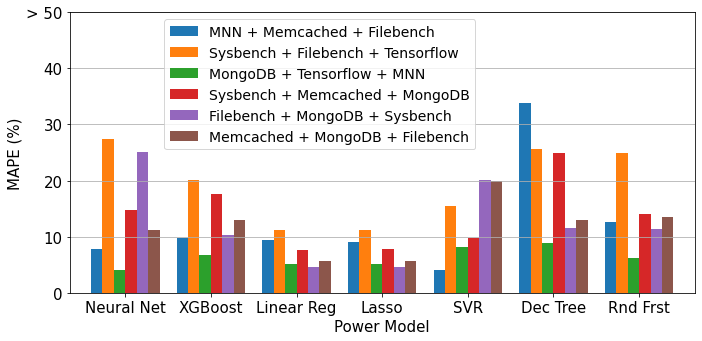

In [18]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
plt.rc('font', size=15)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
# plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(bbox_to_anchor=(0.4, 1), loc='upper center', fontsize='14')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'threewrkld.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

## Four workloads

In [19]:
# Tensorflow + MNN + Filebench + Memcached	Tensorflow + MNN + Stress + Filebench	 MNN + Stress + Sysbench + Memcached	Tensorflow + MNN + Sysbench + Filebench	 MNN + Filebench + Sysbench + Memcached
				
# 16.90	17.12	19.59	9.64	31.06
				
# 17.42	19.76	27.15	23.69	35.76
				
# 9.55	5.95	6.26	8.40	37.41
				
# 6.04	2.83	7.74	8.07	26.74
				
# 16.68	19.44	5.04	15.31	3.81
				
# 3.82	5.32	5.06	10.52	26.48
				
# 17.53	19.87	27.31	23.74	36.10 

data = {
    'Neural Net': {
        'Tensorflow + MNN + Filebench + Memcached': 16.90,
        'Tensorflow + MNN + Stress + Filebench': 17.12,
        'MNN + Stress + Sysbench + Memcached': 19.59,
        'Tensorflow + MNN + Sysbench + Filebench': 9.64,
        'MNN + Filebench + Sysbench + Memcached': 31.06
    },
    'Linear Reg': {
        'Tensorflow + MNN + Filebench + Memcached': 17.42,
        'Tensorflow + MNN + Stress + Filebench': 19.76,
        'MNN + Stress + Sysbench + Memcached': 27.15,
        'Tensorflow + MNN + Sysbench + Filebench': 23.69,
        'MNN + Filebench + Sysbench + Memcached': 35.76
    },
    'Dec Tree': {
        'Tensorflow + MNN + Filebench + Memcached': 9.55,
        'Tensorflow + MNN + Stress + Filebench': 5.95,
        'MNN + Stress + Sysbench + Memcached': 6.26,
        'Tensorflow + MNN + Sysbench + Filebench': 8.40,
        'MNN + Filebench + Sysbench + Memcached': 37.41
    },
    'Rnd Frst': {
        'Tensorflow + MNN + Filebench + Memcached': 6.04,
        'Tensorflow + MNN + Stress + Filebench': 2.83,
        'MNN + Stress + Sysbench + Memcached': 7.74,
        'Tensorflow + MNN + Sysbench + Filebench': 8.07,
        'MNN + Filebench + Sysbench + Memcached': 26.74
    },
    'SVR': {
        'Tensorflow + MNN + Filebench + Memcached': 16.68,
        'Tensorflow + MNN + Stress + Filebench': 19.44,
        'MNN + Stress + Sysbench + Memcached': 5.04,
        'Tensorflow + MNN + Sysbench + Filebench': 15.31,
        'MNN + Filebench + Sysbench + Memcached': 3.81
    },
    'XGBoost': {
        'Tensorflow + MNN + Filebench + Memcached': 3.82,
        'Tensorflow + MNN + Stress + Filebench': 5.32,
        'MNN + Stress + Sysbench + Memcached': 5.06,
        'Tensorflow + MNN + Sysbench + Filebench': 10.52,
        'MNN + Filebench + Sysbench + Memcached': 26.48
    },
    'Lasso': {
        'Tensorflow + MNN + Filebench + Memcached': 17.53,
        'Tensorflow + MNN + Stress + Filebench': 19.87,
        'MNN + Stress + Sysbench + Memcached': 27.31,
        'Tensorflow + MNN + Sysbench + Filebench': 23.74,
        'MNN + Filebench + Sysbench + Memcached': 36.10
    }
}

df = pd.DataFrame(data)
df = df.transpose()
df

,Tensorflow + MNN + Filebench + Memcached,Tensorflow + MNN + Stress + Filebench,MNN + Stress + Sysbench + Memcached,Tensorflow + MNN + Sysbench + Filebench,MNN + Filebench + Sysbench + Memcached
Neural Net,16.90,17.12,19.59,9.64,31.06
Linear Reg,17.42,19.76,27.15,23.69,35.76
Dec Tree,9.55,5.95,6.26,8.40,37.41
Rnd Frst,6.04,2.83,7.74,8.07,26.74
SVR,16.68,19.44,5.04,15.31,3.81
XGBoost,3.82,5.32,5.06,10.52,26.48
Lasso,17.53,19.87,27.31,23.74,36.10


In [20]:
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_13382/3591427930.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])


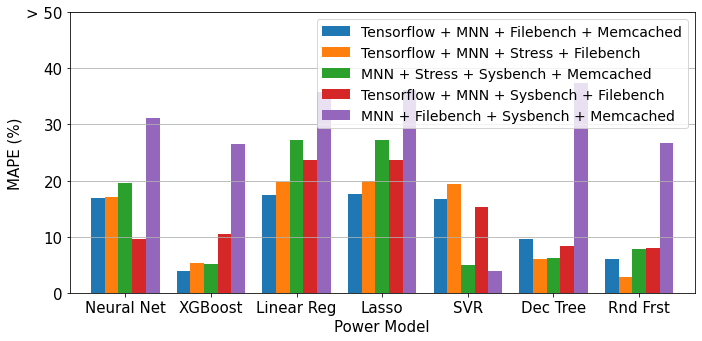

In [21]:
# plot grouped bar chart (benchmarks grouped for each model)
df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
# ylim (0, 50)
plt.ylim(0, 50)
plt.rc('font', size=15)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < 50 else '> 50' for x in plt.gca().get_yticks()])
# font size 15
# plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper right', fontsize='14')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'fourwrkld.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')

plt.show()

In [4]:
# 	Dell Optiplex	Dell Precision	Dell Rack Servers	Lenovo Rack Servers	Apple
# Linear Reg	10	65.6	3.6	182.6	43.4
# Random Forest	8.8	40.2	12.2	58.8	36.6
# Decision Tree	9.4	46.4	13.8	65.4	40.6
# SVR	27.4	57	28	90.8	52.2

data = {
    'Dell Optiplex': {
        'Linear Reg': 10,
        'Random Forest': 8.8,
        'Decision Tree': 9.4,
        'SVR': 27.4
    },
    'Dell Precision': {
        'Linear Reg': 65.6,
        'Random Forest': 40.2,
        'Decision Tree': 46.4,
        'SVR': 57
    },
    'Dell Rack Servers': {
        'Linear Reg': 3.6,
        'Random Forest': 12.2,
        'Decision Tree': 13.8,
        'SVR': 28
    },
    'Lenovo Rack Servers': {
        'Linear Reg': 182.6,
        'Random Forest': 58.8,
        'Decision Tree': 65.4,
        'SVR': 90.8
    },
    'Apple': {
        'Linear Reg': 43.4,
        'Random Forest': 36.6,
        'Decision Tree': 40.6,
        'SVR': 52.2
    }
}

df = pd.DataFrame(data)
# df = df.transpose()
df

,Dell Optiplex,Dell Precision,Dell Rack Servers,Lenovo Rack Servers,Apple
Linear Reg,10.0,65.6,3.6,182.6,43.4
Random Forest,8.8,40.2,12.2,58.8,36.6
Decision Tree,9.4,46.4,13.8,65.4,40.6
SVR,27.4,57.0,28.0,90.8,52.2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_58382/3350631521.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < ylim[1] else '> ' + str(ylim[1]) for x in plt.gca().get_yticks()])


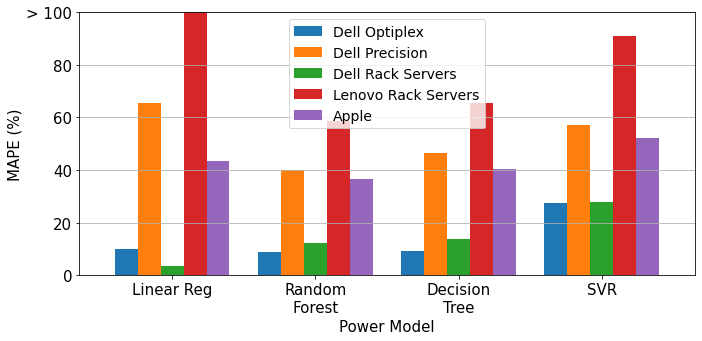

In [8]:
# plot grouped bar chart (benchmarks grouped for each model)

df.plot(kind='bar', figsize=(10, 5), rot=0, width=0.8)
ylim = (0, 100)
plt.ylim(ylim)
plt.rc('font', size=15)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < ylim[1] else '> ' + str(ylim[1]) for x in plt.gca().get_yticks()])
# font size 15
# plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper center', fontsize='14')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'servers.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')


In [22]:
# 	Workload classification	All workloads
# Neural Network	11.75	16.64
# Linear Regression	15.28	12.67
# Decision Tree	20.86	13.64
# Random Forest	12.51	9.55
# SVR	12.25	6.61
# XGBoost	16.35	16.17
# Lasso	15.17	12.62

data = {
    'Workload classification': {
        'Neural Net': 11.75,
        'Linear Reg': 15.28,
        'Dec Tree': 20.86,
        'Rnd Frst': 12.51,
        'SVR': 12.25,
        'XGBoost': 16.35,
        'Lasso': 15.17
    },
    'All workloads': {
        'Neural Net': 16.64,
        'Linear Reg': 12.67,
        'Dec Tree': 13.64,
        'Rnd Frst': 9.55,
        'SVR': 6.61,
        'XGBoost': 16.17,
        'Lasso': 12.62
    }
}

df = pd.DataFrame(data)
# df = df.transpose()
df

,Workload classification,All workloads
Neural Net,11.75,16.64
Linear Reg,15.28,12.67
Dec Tree,20.86,13.64
Rnd Frst,12.51,9.55
SVR,12.25,6.61
XGBoost,16.35,16.17
Lasso,15.17,12.62


In [23]:
df = df.reindex(['Neural Net', 'XGBoost', 'Linear Reg', 'Lasso', 'SVR', 'Dec Tree', 'Rnd Frst'])

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_13382/3938407406.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < ylim[1] else '> ' + str(ylim[1]) for x in plt.gca().get_yticks()])


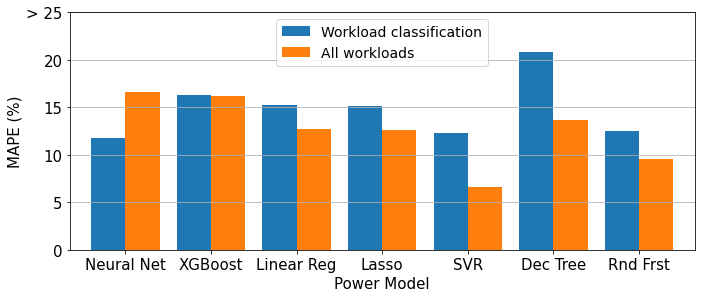

In [27]:
# plot grouped bar chart (benchmarks grouped for each model)

df.plot(kind='bar', figsize=(10, 4.4), rot=0, width=0.8)
ylim = (0, 25)
plt.ylim(ylim)
plt.rc('font', size=15)
# make 50th ytick as "> 50"
plt.gca().set_yticklabels(['{:.0f}'.format(x) if x < ylim[1] else '> ' + str(ylim[1]) for x in plt.gca().get_yticks()])
# font size 15
# plt.rc('font', size=11)
# add horizontal grid lines
plt.grid(axis='y')
plt.xlabel('Power Model')
plt.ylabel('MAPE (%)')
# plt.title('MAPE of Models')
plt.legend(loc='upper center', fontsize='14')
# wrap xlabels into two lines
plt.xticks(range(len(df.index)), ['\n'.join(wrap(l, 10)) for l in df.index])
plt.tight_layout()

image_format = 'pdf'
image_name = 'wrkld_class.pdf'
plt.savefig(image_name, format=image_format, dpi=1200, bbox_inches='tight')
